In [1]:
import pandas as pd
import numpy as np
from glob2 import glob
from sklearn.decomposition import PCA
from scipy.linalg import norm 
import plotly_express as px
import seaborn as sns
sns.set(style = 'ticks')
%matplotlib inline
import os 
os.chdir('/Users/gracelyons/Desktop/MSDS/Capstone/')

## LDA

In [2]:
n_terms = 4000
n_topics = 30
max_iter = 5
OHCO = ['speaker_id']

In [3]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation as LDA
%matplotlib inline

In [4]:
tokens = pd.read_csv('output files/TOKEN.csv')
speakers = tokens[tokens.pos.str.match(r'^NNS?$')]\
            .groupby(['speaker_id']).term_str.apply(lambda x: ' '.join(x)).to_frame()\
            .rename(columns = {'term_str': 'speaker_str'})

In [5]:
speakers.head()

,speaker_str
speaker_id,
201,morning class today today expectations groups ...
202,morning class guys today expectations class we...
203,class today um rules class expectations class ...
204,class name today expectations today anyone exp...
205,guys today today um expectations classroom exp...


In [6]:
tfv = CountVectorizer(max_features = n_terms, stop_words = 'english')
tf = tfv.fit_transform(speakers.speaker_str)
terms = tfv.get_feature_names_out()

In [7]:
lda = LDA(n_components = n_topics, max_iter = max_iter, learning_offset = 50., random_state = 0)

In [8]:
theta = pd.DataFrame(lda.fit_transform(tf), index = speakers.index)
theta.columns.name = 'topic_id'

In [9]:
theta.sample(20).style.background_gradient()

topic_id,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29
speaker_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
342,0.223485,0.000330,0.000330,0.000330,0.000330,0.000330,0.000330,0.000330,0.000330,0.767274,0.000330,0.000330,0.000330,0.000330,0.000330,0.000330,0.000330,0.000330,0.000330,0.000330,0.000330,0.000330,0.000330,0.000330,0.000330,0.000330,0.000330,0.000330,0.000330,0.000330
327,0.000617,0.000617,0.000617,0.000617,0.000617,0.000617,0.000617,0.000617,0.000617,0.880669,0.000617,0.000617,0.000617,0.000617,0.102047,0.000617,0.000617,0.000617,0.000617,0.000617,0.000617,0.000617,0.000617,0.000617,0.000617,0.000617,0.000617,0.000617,0.000617,0.000617
222,0.000513,0.000513,0.000513,0.000513,0.000513,0.000513,0.000513,0.000513,0.000513,0.000513,0.000513,0.000513,0.000513,0.000513,0.000513,0.000513,0.000513,0.000513,0.000513,0.000513,0.000513,0.000513,0.000513,0.000513,0.000513,0.000513,0.000513,0.985128,0.000513,0.000513
221,0.000469,0.000469,0.000469,0.000469,0.000469,0.000469,0.000469,0.000469,0.000469,0.986385,0.000469,0.000469,0.000469,0.000469,0.000469,0.000469,0.000469,0.000469,0.000469,0.000469,0.000469,0.000469,0.000469,0.000469,0.000469,0.000469,0.000469,0.000469,0.000469,0.000469
213,0.000392,0.000392,0.000392,0.000392,0.000392,0.000392,0.000392,0.000392,0.000392,0.988627,0.000392,0.000392,0.000392,0.000392,0.000392,0.000392,0.000392,0.000392,0.000392,0.000392,0.000392,0.000392,0.000392,0.000392,0.000392,0.000392,0.000392,0.000392,0.000392,0.000392
322,0.000694,0.000694,0.000694,0.000694,0.000694,0.000694,0.000694,0.000694,0.000694,0.000694,0.000694,0.000694,0.000694,0.000694,0.000694,0.000694,0.000694,0.000694,0.000694,0.000694,0.000694,0.000694,0.000694,0.000694,0.000694,0.979861,0.000694,0.000694,0.000694,0.000694
217,0.986937,0.000450,0.000450,0.000450,0.000450,0.000450,0.000450,0.000450,0.000450,0.000450,0.000450,0.000450,0.000450,0.000450,0.000450,0.000450,0.000450,0.000450,0.000450,0.000450,0.000450,0.000450,0.000450,0.000450,0.000450,0.000450,0.000450,0.000450,0.000450,0.000450
313,0.000538,0.000538,0.984409,0.000538,0.000538,0.000538,0.000538,0.000538,0.000538,0.000538,0.000538,0.000538,0.000538,0.000538,0.000538,0.000538,0.000538,0.000538,0.000538,0.000538,0.000538,0.000538,0.000538,0.000538,0.000538,0.000538,0.000538,0.000538,0.000538,0.000538
325,0.000463,0.000463,0.000463,0.000463,0.000463,0.000463,0.000463,0.000463,0.000463,0.000463,0.000463,0.000463,0.000463,0.000463,0.000463,0.000463,0.000463,0.000463,0.000463,0.986574,0.000463,0.000463,0.000463,0.000463,0.000463,0.000463,0.000463,0.000463,0.000463,0.000463


In [21]:
theta.to_csv('output files/theta_lda.csv')

In [10]:
phi = pd.DataFrame(lda.components_, columns = terms)
phi.index.name = 'topic_id'
phi.columns.name = 'term_str'

In [11]:
phi.T.head().style.background_gradient()

topic_id,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29
term_str,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
abilities,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,1.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333
ability,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,1.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333
act,0.033333,0.033333,0.033333,1.033333,0.033333,0.033333,0.033333,0.033333,0.033333,2.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,1.033333,0.033333,0.033333
action,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,1.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333
activities,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,1.033333,1.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,1.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333


In [19]:
phi.to_csv('output files/phi_lda.csv')

In [12]:
topics = phi.stack().to_frame().rename(columns = {0: 'weight'})\
            .groupby('topic_id').apply(lambda x: x.weight.sort_values(ascending = False).head(10)
                                                   .reset_index().drop('topic_id', axis = 1).term_str)

In [13]:
topics

term_str,0,1,2,3,4,5,6,7,8,9
topic_id,,,,,,,,,,
0,classroom,norms,break,okay,kind,right,share,way,anybody,today
1,abilities,readings,reasons,recess,record,refocus,refrain,refresher,relate,relaxing
2,norms,norm,classroom,questions,okay,vacation,class,school,speaker,hands
3,school,expectations,bit,way,expectation,guys,lot,people,weekend,classroom
4,abilities,readings,reasons,recess,record,refocus,refrain,refresher,relate,relaxing
5,right,morning,hands,work,attention,thing,norms,classroom,people,space
6,abilities,readings,reasons,recess,record,refocus,refrain,refresher,relate,relaxing
7,classroom,class,expectations,hand,kind,time,ideas,attention,things,morning
8,classroom,norms,kind,people,care,time,class,example,ideas,guys


In [22]:
topics.to_csv('output files/topics_lda.csv')

In [14]:
topics['label'] = topics.apply(lambda x: str(x.name) + ' ' + ' '.join(x[:7].astype('str')),1)

In [15]:
topics.label

topic_id
0         0 classroom norms break okay kind right share
1     1 abilities readings reasons recess record ref...
2     2 norms norm classroom questions okay vacation...
3     3 school expectations bit way expectation guys...
4     4 abilities readings reasons recess record ref...
5      5 right morning hands work attention thing norms
6     6 abilities readings reasons recess record ref...
7     7 classroom class expectations hand kind time ...
8         8 classroom norms kind people care time class
9     9 class classroom expectations things phones b...
10    10 classroom today break right norm questions ...
11    11 anybody everybody hand vacation classroom t...
12    12 abilities readings reasons recess record re...
13    13 abilities readings reasons recess record re...
14    14 expectations pencil time classroom class ha...
15    15 classroom rules kind directions class words...
16    16 classroom norms hands class materials conve...
17    17 classroom norms class norm sch

In [16]:
topics['speaker_weight_sum'] = theta.sum()

<AxesSubplot:ylabel='label'>

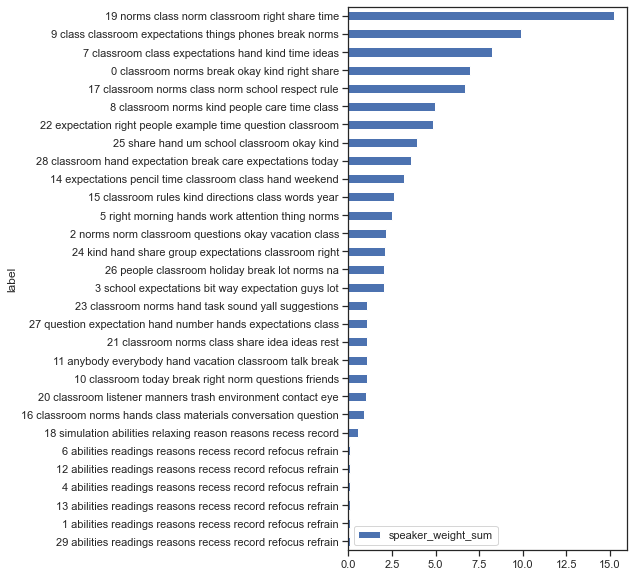

In [17]:
topics.sort_values('speaker_weight_sum', ascending = True).plot.barh(y = 'speaker_weight_sum', x = 'label', figsize = (5, 10))